In [3]:
#!pip install yfinance
#!pip install numpy
#!pip install matplotlib
#!pip install pandas

import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import skew, kurtosis
import math
from tabulate import tabulate

In [16]:
# Retrieve Bitcoin prices from Yahoo Finance API
start_date = '2015-01-01'
end_date = '2023-01-01'
tickers = ['BTC-USD', 'AAPL', 'GOOGL', 'AMZN', 'NVDA', '^NDX', 'XU100.IS', 'AKBNK.IS', 'TUPRS.IS']

data_daily = yf.download(tickers, start=start_date, end=end_date, interval='1d', group_by='ticker')
data_yearly = data_daily.resample('Y').last()
data_monthly = data_daily.resample('M').last()
data_weekly = data_daily.resample('W').last()

[*********************100%%**********************]  9 of 9 completed


In [41]:
# Get 'Close' prices for all tickers
close_prices_daily = data_daily.loc[:, (slice(None), 'Close')]
close_prices_weekly = data_weekly.loc[:, (slice(None), 'Close')]
close_prices_monthly = data_monthly.loc[:, (slice(None), 'Close')]
close_prices_yearly = data_yearly.loc[:, (slice(None), 'Close')]

close_prices_dict = {
    'Daily': close_prices_daily, 
    'Weekly': close_prices_weekly, 
    'Monthly': close_prices_monthly, 
    'Yearly': close_prices_yearly
    }

for key, close_prices in close_prices_dict.items():
    close_prices_dict[key].columns = close_prices_dict[key].columns.droplevel(1)

In [43]:
print(close_prices_dict["Daily"]["AAPL"].head())

Date
2015-01-01        NaN
2015-01-02    27.3325
2015-01-03        NaN
2015-01-04        NaN
2015-01-05    26.5625
Freq: D, Name: AAPL, dtype: float64


In [45]:
# ESKI KOD
def remove_nan_from_list(input_list):
    return list(filter(lambda x: not (isinstance(x, float) and math.isnan(x)), input_list))


def remove_nan_from_list(input_list):
    return list(filter(lambda x: not (isinstance(x, float) and math.isnan(x)), input_list))


In [ ]:
# BUNU ÇALIŞTIRMA
#close_prices_dict["Daily"]['XU100.IS'].iloc[:2034] = close_prices_dict["Daily"].iloc[:2034].apply(lambda x: x / 100)

<ipython-input-5-402983e47d3a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close_prices_daily['XU100.IS'].iloc[:2034] = close_prices_daily['XU100.IS'].iloc[:2034].apply(lambda x: x / 100)


In [48]:
# Daily Lists
daily_lists = {}

for ticker in tickers:
    # Filter out NaN values from the list
    cleaned_list = [price for price in close_prices_dict["Daily"][ticker].tolist() if not math.isnan(price)]

    # Modify prices for specific ticker if necessary
    if ticker == 'XU100.IS':
        cleaned_list = [price / 100 if price > 20000 else price for price in cleaned_list]
    
    daily_lists[ticker] = cleaned_list


"""
btc_list = remove_nan_from_list(close_prices_daily['BTC-USD'].tolist())
aapl_list = remove_nan_from_list(close_prices_daily['AAPL'].tolist())
googl_list = remove_nan_from_list(close_prices_daily['GOOGL'].tolist())
amzn_list = remove_nan_from_list(close_prices_daily['AMZN'].tolist())
nvda_list = remove_nan_from_list(close_prices_daily['NVDA'].tolist())
ndx_list = remove_nan_from_list(close_prices_daily['^NDX'].tolist())
xu100_list = remove_nan_from_list(close_prices_daily['XU100.IS'].tolist())
akbnk_list = remove_nan_from_list(close_prices_daily['AKBNK.IS'].tolist())
tuprs_list = remove_nan_from_list(close_prices_daily['TUPRS.IS'].tolist())

xu100_list = [price / 100 if price > 20000 else price for price in xu100_list]
"""

# Weekly Lists
weekly_lists = {}

for ticker in tickers:
    # Filter out NaN values from the list
    cleaned_list = [price for price in close_prices_dict["Weekly"][ticker].tolist() if not math.isnan(price)]

    # Modify prices for specific ticker if necessary
    if ticker == 'XU100.IS':
        cleaned_list = [price / 100 if price > 20000 else price for price in cleaned_list]
    
    weekly_lists[ticker] = cleaned_list


"""
btc_list_weekly = remove_nan_from_list(close_prices_weekly['BTC-USD'].tolist())
aapl_list_weekly = remove_nan_from_list(close_prices_weekly['AAPL'].tolist())
googl_list_weekly = remove_nan_from_list(close_prices_weekly['GOOGL'].tolist())
amzn_list_weekly = remove_nan_from_list(close_prices_weekly['AMZN'].tolist())
nvda_list_weekly = remove_nan_from_list(close_prices_weekly['NVDA'].tolist())
ndx_list_weekly = remove_nan_from_list(close_prices_weekly['^NDX'].tolist())
xu100_list_weekly = remove_nan_from_list(close_prices_weekly['XU100.IS'].tolist())
akbnk_list_weekly = remove_nan_from_list(close_prices_weekly['AKBNK.IS'].tolist())
tuprs_list_weekly = remove_nan_from_list(close_prices_weekly['TUPRS.IS'].tolist())
"""

# Monthly Lists
monthly_lists = {}

for ticker in tickers:
    # Filter out NaN values from the list
    cleaned_list = [price for price in close_prices_dict["Monthly"][ticker].tolist() if not math.isnan(price)]

    # Modify prices for specific ticker if necessary
    if ticker == 'XU100.IS':
        cleaned_list = [price / 100 if price > 20000 else price for price in cleaned_list]
    
    monthly_lists[ticker] = cleaned_list

"""
btc_list_monthly = remove_nan_from_list(close_prices_monthly['BTC-USD'].tolist())
aapl_list_monthly = remove_nan_from_list(close_prices_monthly['AAPL'].tolist())
googl_list_monthly = remove_nan_from_list(close_prices_monthly['GOOGL'].tolist())
amzn_list_monthly = remove_nan_from_list(close_prices_monthly['AMZN'].tolist())
nvda_list_monthly = remove_nan_from_list(close_prices_monthly['NVDA'].tolist())
ndx_list_monthly = remove_nan_from_list(close_prices_monthly['^NDX'].tolist())
xu100_list_monthly = remove_nan_from_list(close_prices_monthly['XU100.IS'].tolist())
akbnk_list_monthly = remove_nan_from_list(close_prices_monthly['AKBNK.IS'].tolist())
tuprs_list_monthly = remove_nan_from_list(close_prices_monthly['TUPRS.IS'].tolist())
"""

# Yearly Lists
yearly_lists = {}

for ticker in tickers:
    # Filter out NaN values from the list
    cleaned_list = [price for price in close_prices_dict["Yearly"][ticker].tolist() if not math.isnan(price)]

    # Modify prices for specific ticker if necessary
    if ticker == 'XU100.IS':
        cleaned_list = [price / 100 if price > 20000 else price for price in cleaned_list]
    
    yearly_lists[ticker] = cleaned_list
    
"""
btc_list_yearly = remove_nan_from_list(close_prices_yearly['BTC-USD'].tolist())
aapl_list_yearly = remove_nan_from_list(close_prices_yearly['AAPL'].tolist())
googl_list_yearly = remove_nan_from_list(close_prices_yearly['GOOGL'].tolist())
amzn_list_yearly = remove_nan_from_list(close_prices_yearly['AMZN'].tolist())
nvda_list_yearly = remove_nan_from_list(close_prices_yearly['NVDA'].tolist())
ndx_list_yearly = remove_nan_from_list(close_prices_yearly['^NDX'].tolist())
xu100_list_yearly = remove_nan_from_list(close_prices_yearly['XU100.IS'].tolist())
akbnk_list_yearly = remove_nan_from_list(close_prices_yearly['AKBNK.IS'].tolist())
tuprs_list_yearly = remove_nan_from_list(close_prices_yearly['TUPRS.IS'].tolist())
"""

"\nbtc_list_yearly = remove_nan_from_list(close_prices_yearly['BTC-USD'].tolist())\naapl_list_yearly = remove_nan_from_list(close_prices_yearly['AAPL'].tolist())\ngoogl_list_yearly = remove_nan_from_list(close_prices_yearly['GOOGL'].tolist())\namzn_list_yearly = remove_nan_from_list(close_prices_yearly['AMZN'].tolist())\nnvda_list_yearly = remove_nan_from_list(close_prices_yearly['NVDA'].tolist())\nndx_list_yearly = remove_nan_from_list(close_prices_yearly['^NDX'].tolist())\nxu100_list_yearly = remove_nan_from_list(close_prices_yearly['XU100.IS'].tolist())\nakbnk_list_yearly = remove_nan_from_list(close_prices_yearly['AKBNK.IS'].tolist())\ntuprs_list_yearly = remove_nan_from_list(close_prices_yearly['TUPRS.IS'].tolist())\n"

In [49]:
linear_returns = {}

for lst in daily_lists.values():
    for ticker in tickers:
        linear_returns[ticker] = pd.Series(lst).pct_change()
        
"""
btc_series = pd.Series(btc_list)
linear_btc_returns = btc_series.pct_change()

aapl_series = pd.Series(aapl_list)
linear_aapl_returns = aapl_series.pct_change()

googl_series = pd.Series(googl_list)
linear_googl_returns = googl_series.pct_change()

amzn_series = pd.Series(amzn_list)
linear_amzn_returns = amzn_series.pct_change()

nvda_series = pd.Series(nvda_list)
linear_nvda_returns = nvda_series.pct_change()

ndx_series = pd.Series(ndx_list)
linear_ndx_returns = ndx_series.pct_change()

xu100_series = pd.Series(xu100_list)
linear_xu100_returns = xu100_series.pct_change()

akbnk_series = pd.Series(akbnk_list)
linear_akbnk_returns = akbnk_series.pct_change()

tuprs_series = pd.Series(tuprs_list)
linear_tuprs_returns = tuprs_series.pct_change()
"""

In [50]:
for key, returns in linear_returns.items():
    print(f"Linear {key} Returns:")
    print(returns)

"""
print("Linear BTC Returns:")
print(linear_btc_returns)

print("\nLinear AAPL Returns:")
print(linear_aapl_returns)

print("\nLinear GOOGL Returns:")
print(linear_googl_returns)

print("\nLinear AMZN Returns:")
print(linear_amzn_returns)

print("\nLinear NVDA Returns:")
print(linear_nvda_returns)

print("\nLinear NDX Returns:")
print(linear_ndx_returns)

print("\nLinear XU100 Returns:")
print(linear_xu100_returns)

print("\nLinear AKBNK Returns:")
print(linear_akbnk_returns)

print("\nLinear TUPRS Returns:")
print(linear_tuprs_returns)
"""


Linear BTC-USD Returns:
0            NaN
1       0.010850
2       0.012522
3       0.001767
4      -0.005291
          ...   
2051    0.036253
2052   -0.004914
2053    0.001580
2054   -0.001183
2055    0.046199
Length: 2056, dtype: float64
Linear AAPL Returns:
0            NaN
1       0.010850
2       0.012522
3       0.001767
4      -0.005291
          ...   
2051    0.036253
2052   -0.004914
2053    0.001580
2054   -0.001183
2055    0.046199
Length: 2056, dtype: float64
Linear GOOGL Returns:
0            NaN
1       0.010850
2       0.012522
3       0.001767
4      -0.005291
          ...   
2051    0.036253
2052   -0.004914
2053    0.001580
2054   -0.001183
2055    0.046199
Length: 2056, dtype: float64
Linear AMZN Returns:
0            NaN
1       0.010850
2       0.012522
3       0.001767
4      -0.005291
          ...   
2051    0.036253
2052   -0.004914
2053    0.001580
2054   -0.001183
2055    0.046199
Length: 2056, dtype: float64
Linear NVDA Returns:
0            NaN
1       0.

In [69]:
def calculate_statistics(data):
    mean = np.mean(data)
    variance = np.var(data, ddof=1)  # ddof=1 for sample variance
    std_dev = np.std(data, ddof=1)   # ddof=1 for sample standard deviation
    skewness = skew(data)
    excess_kurtosis = kurtosis(data, fisher=True)  # Fisher's definition for excess kurtosis
    return [mean, variance, std_dev, skewness, excess_kurtosis]

In [76]:
# Daily Stats
daily_stats = {}

for key, daily_list in daily_lists.items():
    daily_stats[key] = calculate_statistics(pd.Series(daily_list).pct_change()[1:])

"""
btc_stats = calculate_statistics(pd.Series(btc_list).pct_change()[1:])
aapl_stats = calculate_statistics(pd.Series(aapl_list).pct_change()[1:])
googl_stats = calculate_statistics(pd.Series(googl_list).pct_change()[1:])
amzn_stats = calculate_statistics(pd.Series(amzn_list).pct_change()[1:])
nvda_stats = calculate_statistics(pd.Series(nvda_list).pct_change()[1:])
ndx_stats = calculate_statistics(pd.Series(ndx_list).pct_change()[1:])
xu100_stats = calculate_statistics(pd.Series(xu100_list).pct_change()[1:])
akbnk_stats = calculate_statistics(pd.Series(akbnk_list).pct_change()[1:])
tuprs_stats = calculate_statistics(pd.Series(tuprs_list).pct_change()[1:])
"""

# Weekly Stats
weekly_stats = {}
for key, weekly_list in weekly_lists.items():
    weekly_stats[key] = calculate_statistics(pd.Series(weekly_list).pct_change()[1:])

"""
btc_stats_weekly = calculate_statistics(pd.Series(btc_list_weekly).pct_change()[1:])
aapl_stats_weekly = calculate_statistics(pd.Series(aapl_list_weekly).pct_change()[1:])
googl_stats_weekly = calculate_statistics(pd.Series(googl_list_weekly).pct_change()[1:])
amzn_stats_weekly = calculate_statistics(pd.Series(amzn_list_weekly).pct_change()[1:])
nvda_stats_weekly = calculate_statistics(pd.Series(nvda_list_weekly).pct_change()[1:])
ndx_stats_weekly = calculate_statistics(pd.Series(ndx_list_weekly).pct_change()[1:])
xu100_stats_weekly = calculate_statistics(pd.Series(xu100_list_weekly).pct_change()[1:])
akbnk_stats_weekly = calculate_statistics(pd.Series(akbnk_list_weekly).pct_change()[1:])
tuprs_stats_weekly = calculate_statistics(pd.Series(tuprs_list_weekly).pct_change()[1:])
"""

# Monthly Stats
monthly_stats = {}
for key, monthly_list in monthly_lists.items():
    monthly_stats[key] = calculate_statistics(pd.Series(monthly_list).pct_change()[1:])

"""
btc_stats_monthly = calculate_statistics(pd.Series(btc_list_monthly).pct_change()[1:])
aapl_stats_monthly = calculate_statistics(pd.Series(aapl_list_monthly).pct_change()[1:])
googl_stats_monthly = calculate_statistics(pd.Series(googl_list_monthly).pct_change()[1:])
amzn_stats_monthly = calculate_statistics(pd.Series(amzn_list_monthly).pct_change()[1:])
nvda_stats_monthly = calculate_statistics(pd.Series(nvda_list_monthly).pct_change()[1:])
ndx_stats_monthly = calculate_statistics(pd.Series(ndx_list_monthly).pct_change()[1:])
xu100_stats_monthly = calculate_statistics(pd.Series(xu100_list_monthly).pct_change()[1:])
akbnk_stats_monthly = calculate_statistics(pd.Series(akbnk_list_monthly).pct_change()[1:])
tuprs_stats_monthly = calculate_statistics(pd.Series(tuprs_list_monthly).pct_change()[1:])
"""

# Yearly Stats
yearly_stats = {}
for key, yearly_list in yearly_lists.items():
    yearly_stats[key] = calculate_statistics(pd.Series(yearly_list).pct_change()[1:])

"""
btc_stats_yearly = calculate_statistics(pd.Series(btc_list_yearly).pct_change()[1:])
aapl_stats_yearly = calculate_statistics(pd.Series(aapl_list_yearly).pct_change()[1:])
googl_stats_yearly = calculate_statistics(pd.Series(googl_list_yearly).pct_change()[1:])
amzn_stats_yearly = calculate_statistics(pd.Series(amzn_list_yearly).pct_change()[1:])
nvda_stats_yearly = calculate_statistics(pd.Series(nvda_list_yearly).pct_change()[1:])
ndx_stats_yearly = calculate_statistics(pd.Series(ndx_list_yearly).pct_change()[1:])
xu100_stats_yearly = calculate_statistics(pd.Series(xu100_list_yearly).pct_change()[1:])
akbnk_stats_yearly = calculate_statistics(pd.Series(akbnk_list_yearly).pct_change()[1:])
tuprs_stats_yearly = calculate_statistics(pd.Series(tuprs_list_yearly).pct_change()[1:])
"""


'\nbtc_stats_yearly = calculate_statistics(pd.Series(btc_list_yearly).pct_change()[1:])\naapl_stats_yearly = calculate_statistics(pd.Series(aapl_list_yearly).pct_change()[1:])\ngoogl_stats_yearly = calculate_statistics(pd.Series(googl_list_yearly).pct_change()[1:])\namzn_stats_yearly = calculate_statistics(pd.Series(amzn_list_yearly).pct_change()[1:])\nnvda_stats_yearly = calculate_statistics(pd.Series(nvda_list_yearly).pct_change()[1:])\nndx_stats_yearly = calculate_statistics(pd.Series(ndx_list_yearly).pct_change()[1:])\nxu100_stats_yearly = calculate_statistics(pd.Series(xu100_list_yearly).pct_change()[1:])\nakbnk_stats_yearly = calculate_statistics(pd.Series(akbnk_list_yearly).pct_change()[1:])\ntuprs_stats_yearly = calculate_statistics(pd.Series(tuprs_list_yearly).pct_change()[1:])\n'

In [56]:
print(daily_stats)

{'BTC-USD': (0.0021063309061159657, 0.0014816218515253628, 0.03849184136314295, -0.18074182910785652, 7.232555472876557), 'AAPL': (0.0009528695019091577, 0.0003562676511718384, 0.018875053673349868, -0.012155994650217123, 5.065525756576097), 'GOOGL': (0.0007563174873536244, 0.000317516721150735, 0.017818998881832138, 0.3176315156256816, 7.294362301596372), 'AMZN': (0.0010608860607751731, 0.000439943238417502, 0.020974823918629256, 0.4692231135249699, 6.749361248965535), 'NVDA': (0.0021307066908837703, 0.0009182041404484717, 0.03030188344721284, 0.45052963817084213, 8.363331236152), '^NDX': (0.000576590539020347, 0.00020824923001484157, 0.014430843011232628, -0.3566735585901841, 6.984784952883601), 'XU100.IS': (0.00103786794807902, 0.00021365757537239195, 0.014617030319883446, -0.7393283128368786, 4.776758357561374), 'AKBNK.IS': (0.0007386657237412768, 0.0005364422267823339, 0.0231612224803082, 0.1967427421410911, 3.082355708627575), 'TUPRS.IS': (0.0013318735510087446, 0.000462739259530

In [60]:
# ESKI KOD
# Function to print stats in a tabular format
def print_stats(title, *stats):
    headers = ["Asset", "Mean", "Variance", "Std_Dev", "Skewness", "Excess_Kurtosis"]
    assets = ["BTC", "AAPL", "GOOGL", "AMZN", "NVDA", "NSDQ", "XU100", "AKBNK", "TUPRS"]

    # Combine asset names and corresponding stats
    data = [tuple([asset] + stat) for asset, stat in zip(assets, stats)]

    # Print the table
    print(title)
    print(tabulate(data, headers=headers, tablefmt="pretty"))
    print("\n")

In [78]:
def print_stats(title: str, stats_dict: dict):
    headers = ["Asset", "Mean", "Variance", "Std_Dev", "Skewness", "Excess_Kurtosis"]
    data = []

    # Extract asset names and corresponding stats from the dictionary
    for asset, stats in stats_dict.items():
        data.append([asset] + stats)

    # Print the table
    print(title)
    print(tabulate(data, headers=headers, tablefmt="pretty"))
    print("\n")

In [77]:
# Daily Stats Print
#print_stats("Daily Stats", btc_stats, aapl_stats, googl_stats, amzn_stats, nvda_stats, ndx_stats, xu100_stats, akbnk_stats, tuprs_stats)
print_stats("Daily Stats", daily_stats)

# Weekly Stats Print
#print_stats("Weekly Stats", btc_stats_weekly, aapl_stats_weekly, googl_stats_weekly, amzn_stats_weekly, nvda_stats_weekly, ndx_stats_weekly, xu100_stats_weekly, akbnk_stats_weekly, tuprs_stats_weekly)
print_stats("Weekly Stats", weekly_stats)

# Monthly Stats Print
#print_stats("Monthly Stats", btc_stats_monthly, aapl_stats_monthly, googl_stats_monthly, amzn_stats_monthly, nvda_stats_monthly, ndx_stats_monthly, xu100_stats_monthly, akbnk_stats_monthly, tuprs_stats_monthly)
print_stats("Monthly Stats", monthly_stats)

# Yearly Stats Print
#print_stats("Yearly Stats", btc_stats_yearly, aapl_stats_yearly, googl_stats_yearly, amzn_stats_yearly, nvda_stats_yearly, ndx_stats_yearly, xu100_stats_yearly, akbnk_stats_yearly, tuprs_stats_yearly)
print_stats("Yearly Stats", yearly_stats)

Daily Stats
+----------+-----------------------+------------------------+----------------------+-----------------------+--------------------+
|  Asset   |         Mean          |        Variance        |       Std_Dev        |       Skewness        |  Excess_Kurtosis   |
+----------+-----------------------+------------------------+----------------------+-----------------------+--------------------+
| BTC-USD  | 0.0021063309061159657 | 0.0014816218515253628  | 0.03849184136314295  | -0.18074182910785652  | 7.232555472876557  |
|   AAPL   | 0.0009528695019091577 | 0.0003562676511718384  | 0.018875053673349868 | -0.012155994650217123 | 5.065525756576097  |
|  GOOGL   | 0.0007563174873536244 |  0.000317516721150735  | 0.017818998881832138 |  0.3176315156256816   | 7.294362301596372  |
|   AMZN   | 0.0010608860607751731 |  0.000439943238417502  | 0.020974823918629256 |  0.4692231135249699   | 6.749361248965535  |
|   NVDA   | 0.0021307066908837703 | 0.0009182041404484717  | 0.03030188344721

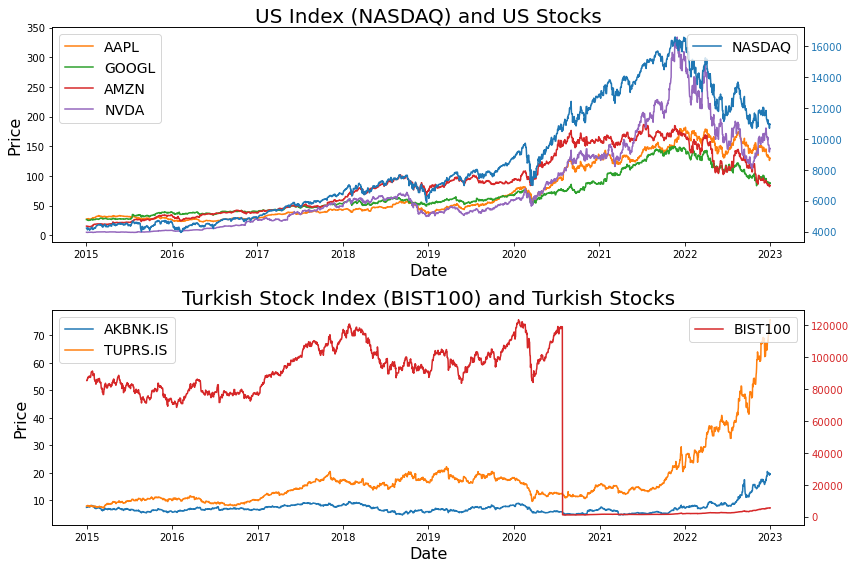

In [79]:
# Create a figure with 2 subplots (one for US stocks and one for Turkish stocks)
fig, axs = plt.subplots(2, figsize=(12,8))

# Plot US index (NASDAQ) and US stocks in the first subplot
axs[0].set_title('US Index (NASDAQ) and US Stocks', fontsize=20)
axs[0].set_xlabel('Date', fontsize=16)
axs[0].set_ylabel('Price', fontsize=16)

# Create a second y-axis for the NASDAQ data
ax2 = axs[0].twinx()

# Plot NASDAQ on the second y-axis
ax2.plot(close_prices_dict["Daily"]['^NDX'].fillna(method='ffill'), label='NASDAQ', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.legend(loc='upper right', bbox_to_anchor=(1, 1), fontsize=14)  # Move NASDAQ legend to right

# Plot the stocks on the first y-axis
axs[0].plot(close_prices_dict["Daily"]['AAPL'].fillna(method='ffill'), label='AAPL', color='tab:orange')
axs[0].plot(close_prices_dict["Daily"]['GOOGL'].fillna(method='ffill'), label='GOOGL', color='tab:green')
axs[0].plot(close_prices_dict["Daily"]['AMZN'].fillna(method='ffill'), label='AMZN', color='tab:red')
axs[0].plot(close_prices_dict["Daily"]['NVDA'].fillna(method='ffill'), label='NVDA', color='tab:purple')
axs[0].legend(loc='upper left', fontsize=14)

# Plot Turkish Stock index (BIST100) and Turkish stocks in the second subplot
axs[1].set_title('Turkish Stock Index (BIST100) and Turkish Stocks', fontsize=20)
axs[1].set_xlabel('Date', fontsize=16)
axs[1].set_ylabel('Price', fontsize=16)

# Create a second y-axis for the BIST100 data
ax3 = axs[1].twinx()
ax3.plot(close_prices_dict["Daily"]['XU100.IS'].fillna(method='ffill'), label='BIST100', color='tab:red')
ax3.tick_params(axis='y', labelcolor='tab:red')
ax3.legend(loc='upper right', bbox_to_anchor=(1, 1), fontsize=14)  # Move BIST100 legend to right

axs[1].plot(close_prices_dict["Daily"]['AKBNK.IS'].fillna(method='ffill'), label='AKBNK.IS')
axs[1].plot(close_prices_dict["Daily"]['TUPRS.IS'].fillna(method='ffill'), label='TUPRS.IS')
axs[1].legend(loc='upper left', fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()

In [84]:
# Calculate daily returns for each stock
btc_returns = linear_returns["BTC-USD"][1:]
aapl_returns = linear_returns["AAPL"][1:]
googl_returns = linear_returns["GOOGL"][1:]
amzn_returns = linear_returns["AMZN"][1:]
nvda_returns = linear_returns["NVDA"][1:]

In [85]:
def calculate_stats(data, label):
    mean = np.mean(data)
    std_dev = np.std(data)
    print(f"{label} Mean: {mean:.6f}, Standard Deviation: {std_dev:.6f}")

In [89]:
linear_returns["BTC-USD"]

0            NaN
1       0.010850
2       0.012522
3       0.001767
4      -0.005291
          ...   
2051    0.036253
2052   -0.004914
2053    0.001580
2054   -0.001183
2055    0.046199
Length: 2056, dtype: float64

AAPL Mean: 0.001332, Standard Deviation: 0.021506
BTC Mean: 0.001332, Standard Deviation: 0.021506
GOOGL Mean: 0.001332, Standard Deviation: 0.021506
AMZN Mean: 0.001332, Standard Deviation: 0.021506
NVDA Mean: 0.001332, Standard Deviation: 0.021506


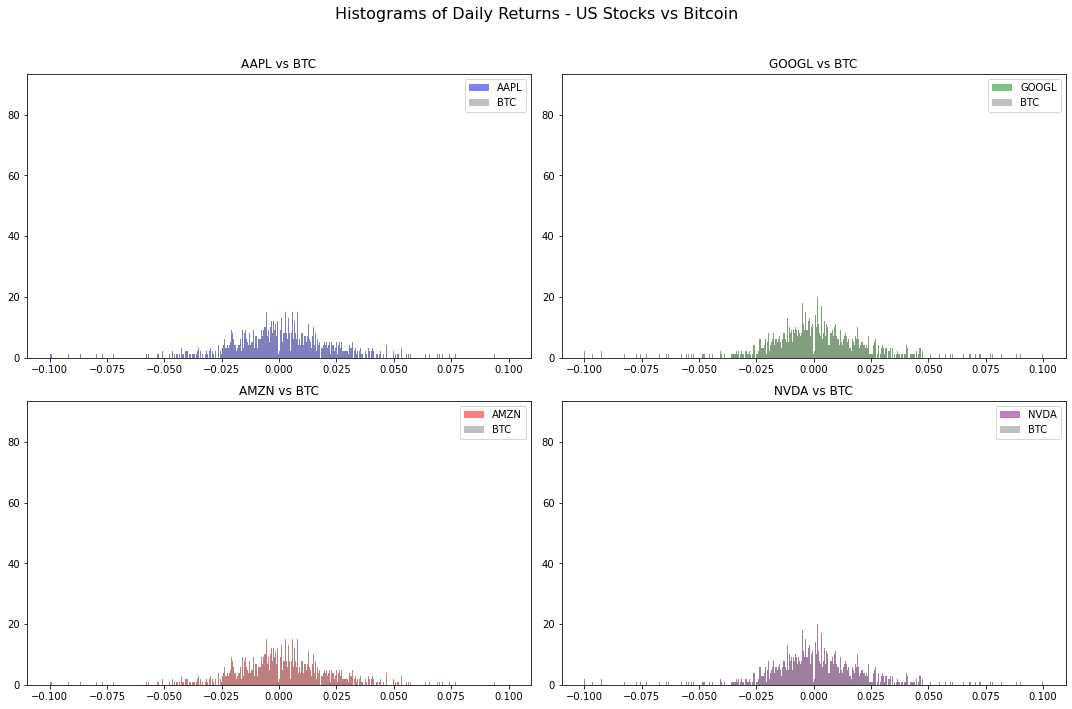

In [94]:
# Create a figure and axis for subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
fig.suptitle('Histograms of Daily Returns - US Stocks vs Bitcoin', fontsize=16)

# Plot histograms for each stock against Bitcoin with increased sensitivity (more bins)
bins = 100

btc_data = linear_returns["BTC-USD"].dropna()

# AAPL vs BTC
aapl_data = linear_returns["AAPL"].dropna()
axes[0, 0].hist(aapl_data, bins=bins, color='blue', alpha=0.5, label='AAPL')
axes[0, 0].hist(btc_data, bins=bins, color='gray', alpha=0.5, label='BTC')
axes[0, 0].set_title('AAPL vs BTC')
axes[0, 0].legend()
calculate_stats(aapl_data, 'AAPL')
calculate_stats(btc_data, 'BTC')

# GOOGL vs BTC
googl_data = linear_returns["GOOGL"].dropna()
axes[0, 1].hist(googl_data, bins=bins, color='green', alpha=0.5, label='GOOGL')
axes[0, 1].hist(btc_data, bins=bins, color='gray', alpha=0.5, label='BTC')
axes[0, 1].set_title('GOOGL vs BTC')
axes[0, 1].legend()
calculate_stats(googl_data, 'GOOGL')

# AMZN vs BTC
amzn_data = linear_returns["AMZN"].dropna()
axes[1, 0].hist(amzn_data, bins=bins, color='red', alpha=0.5, label='AMZN')
axes[1, 0].hist(btc_data, bins=bins, color='gray', alpha=0.5, label='BTC')
axes[1, 0].set_title('AMZN vs BTC')
axes[1, 0].legend()
calculate_stats(amzn_data, 'AMZN')

# NVDA vs BTC
nvda_data = linear_returns["NVDA"].dropna()
axes[1, 1].hist(nvda_data, bins=bins, color='purple', alpha=0.5, label='NVDA')
axes[1, 1].hist(btc_data, bins=bins, color='gray', alpha=0.5, label='BTC')
axes[1, 1].set_title('NVDA vs BTC')
axes[1, 1].legend()
calculate_stats(nvda_data, 'NVDA')

# Adjust layout for better appearance
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plots
plt.show()

AAPL Mean: 0.001332, Standard Deviation: 0.021506
BTC Mean: 0.001332, Standard Deviation: 0.021506


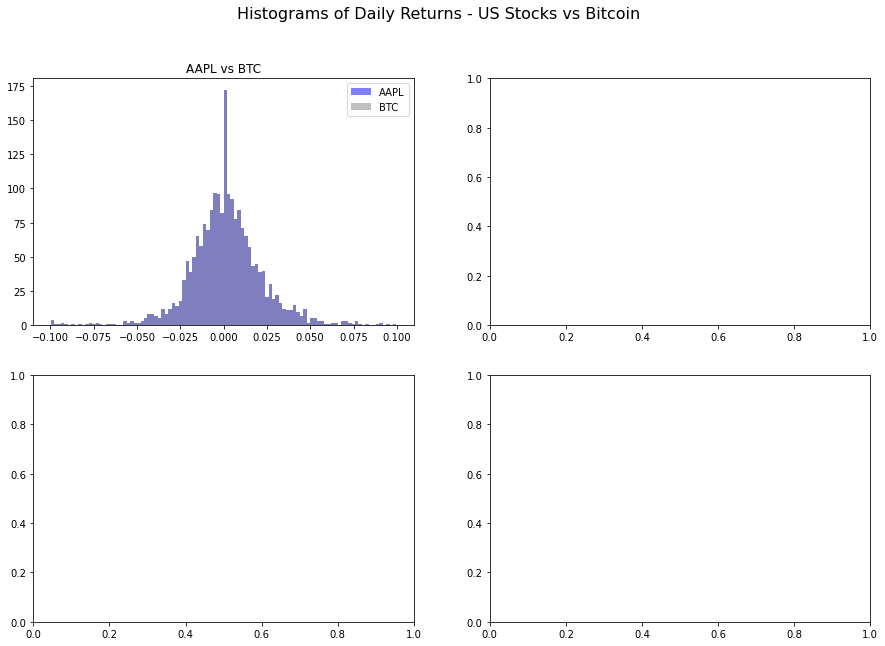

In [93]:
# Create a figure and axis for subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
fig.suptitle('Histograms of Daily Returns - US Stocks vs Bitcoin', fontsize=16)

# Plot histograms for each stock against Bitcoin with increased sensitivity (more bins)
bins = 100

btc_data = linear_returns["BTC-USD"]

# AAPL vs BTC
aapl_data = linear_returns["AAPL"].dropna()
axes[0, 0].hist(aapl_data, bins=bins, color='blue', alpha=0.5, label='AAPL')
axes[0, 0].hist(btc_data, bins=bins, color='gray', alpha=0.5, label='BTC')

axes[0, 0].set_title('AAPL vs BTC')
axes[0, 0].legend()
calculate_stats(aapl_data, 'AAPL')
calculate_stats(btc_data, 'BTC')

In [82]:
linear_returns["BTC-USD"]

0            NaN
1       0.010850
2       0.012522
3       0.001767
4      -0.005291
          ...   
2051    0.036253
2052   -0.004914
2053    0.001580
2054   -0.001183
2055    0.046199
Length: 2056, dtype: float64